In [38]:
import pandas as pd                            #for analyzing data
import numpy as np                             #to work with numerical values
import matplotlib.pyplot as plt                #for creating visualization
import seaborn as sns                          #for plotting data
from wordcloud import WordCloud                #used to show which word is most frequently used
import squarify                                #for visualization
from collections import Counter                #for visualization

In [17]:
zomato = pd.read_csv('Zomato_restaurants_in_india.csv')       #since the data is imported from my hardisk
zomato.head()                                                 

,res_id,name,establishment,address,city,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,1,-1


Data Cleansing: To clean the raw we need to remove duplicate cells, need to delete the column which is not required for analyzing, need to remove null values and so on.

In [19]:
#to delete the columns
zomato.drop(['res_id', 'address', 'latitude', 'longitude', 'locality_verbose',
       'timings', 'rating_text', 'delivery', 'takeaway'],axis=1,inplace=True)
zomato.columns

Index(['name', 'establishment', 'city', 'locality', 'cuisines',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'votes', 'photo_count'],
      dtype='object')

In [20]:
print('No. of features:',zomato.shape[1],'\nNo. of resturants:',zomato.shape[0])

No. of features: 11 
No. of resturants: 211944


In [21]:
zomato.isnull().sum()

name                    0
establishment           0
city                    0
locality                0
cuisines                0
average_cost_for_two    0
price_range             0
highlights              0
aggregate_rating        0
votes                   0
photo_count             0
dtype: int64

In [22]:
zomato.cuisines.fillna('NA',inplace=True)
zomato.cuisines = zomato.cuisines.apply(lambda x : x.split(sep=','))
zomato['establishment'] = zomato.establishment.apply(lambda x : 'NA' if x=='[]' else x[2:-2])

In [23]:
#filtering only Chennai city restaurants
zch = zomato[zomato['city'] == 'Chennai']
print('No. of resturants in Chennai:',zch.shape[0])
zch.head()
zch.to_csv('mycsvfile.csv',index=False)

No. of resturants in Chennai: 11630


In [35]:
!pip install squarify

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Casual Dining'),
  Text(1, 0, 'Quick Bites'),
  Text(2, 0, 'Café'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Fine Dining'),
  Text(5, 0, 'Dessert Parlour'),
  Text(6, 0, 'Beverage Shop'),
  Text(7, 0, 'Pub'),
  Text(8, 0, 'Bakery'),
  Text(9, 0, 'NA'),
  Text(10, 0, 'Mess'),
  Text(11, 0, 'Sweet Shop'),
  Text(12, 0, 'Kiosk'),
  Text(13, 0, 'Food Court'),
  Text(14, 0, 'Lounge'),
  Text(15, 0, 'Food Truck'),
  Text(16, 0, 'Dhaba'),
  Text(17, 0, 'Club'),
  Text(18, 0, 'Confectionery'),
  Text(19, 0, 'Paan Shop'),
  Text(20, 0, 'Butcher Shop'),
  Text(21, 0, 'Bhojanalya')])

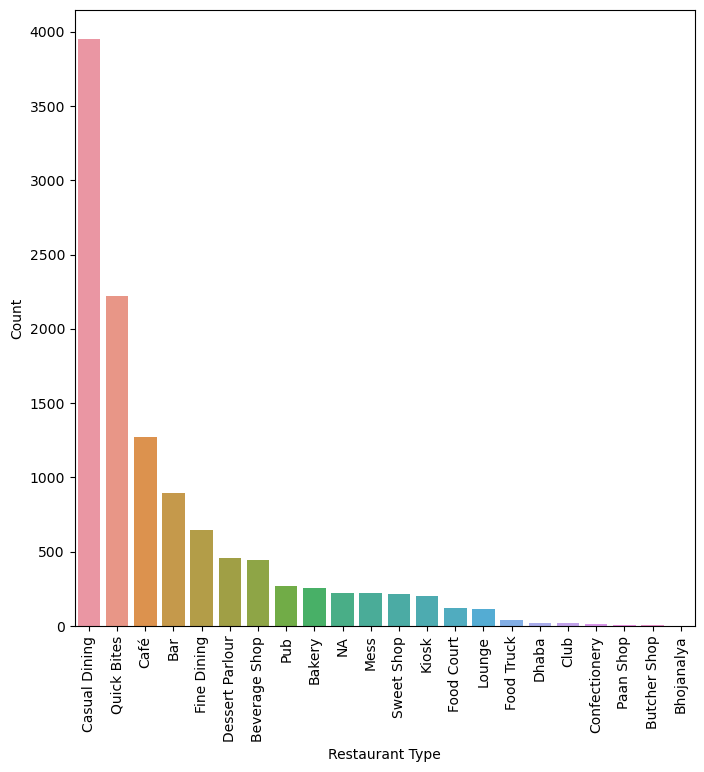

In [24]:
rd_type = zch.establishment.value_counts().reset_index().set_index('index')
plt.figure(figsize=(8,8))
sns.barplot(x=rd_type.index,y=rd_type.establishment)
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'T. Nagar'),
  Text(1, 0, 'Potheri'),
  Text(2, 0, 'Nungambakkam'),
  Text(3, 0, 'Kodambakkam'),
  Text(4, 0, 'Anna Nagar East'),
  Text(5, 0, 'RA Puram'),
  Text(6, 0, 'Velachery'),
  Text(7, 0, 'Adyar'),
  Text(8, 0, 'Alwarpet'),
  Text(9, 0, 'Ashok Nagar'),
  Text(10, 0, 'Phoenix Market City, Velachery'),
  Text(11, 0, 'Navallur'),
  Text(12, 0, 'Perungudi'),
  Text(13, 0, 'Besant Nagar'),
  Text(14, 0, 'Express Avenue Mall,  Royapettah'),
  Text(15, 0, 'GST Road'),
  Text(16, 0, 'Anna Nagar West'),
  Text(17, 0, 'Mylapore'),
  Text(18, 0, 'Palavakkam'),
  Text(19, 0, 'Hotel Park Elanza, Nungambakkam')])

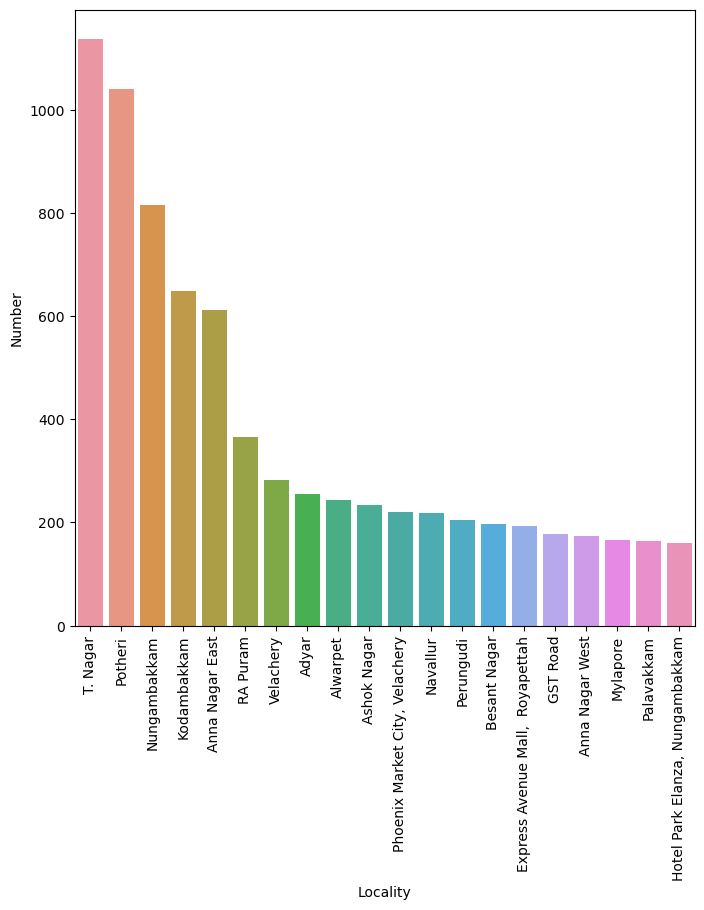

In [25]:
rd_loc = zch.locality.value_counts().head(20).reset_index().set_index('index') 
plt.figure(figsize=(8,8))
sns.barplot(x=rd_loc.index,y=rd_loc.locality)
plt.xlabel('Locality')
plt.ylabel('Number')
plt.xticks(rotation='vertical')

/Users/syedmanzoor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_cost_for_two', ylabel='Density'>

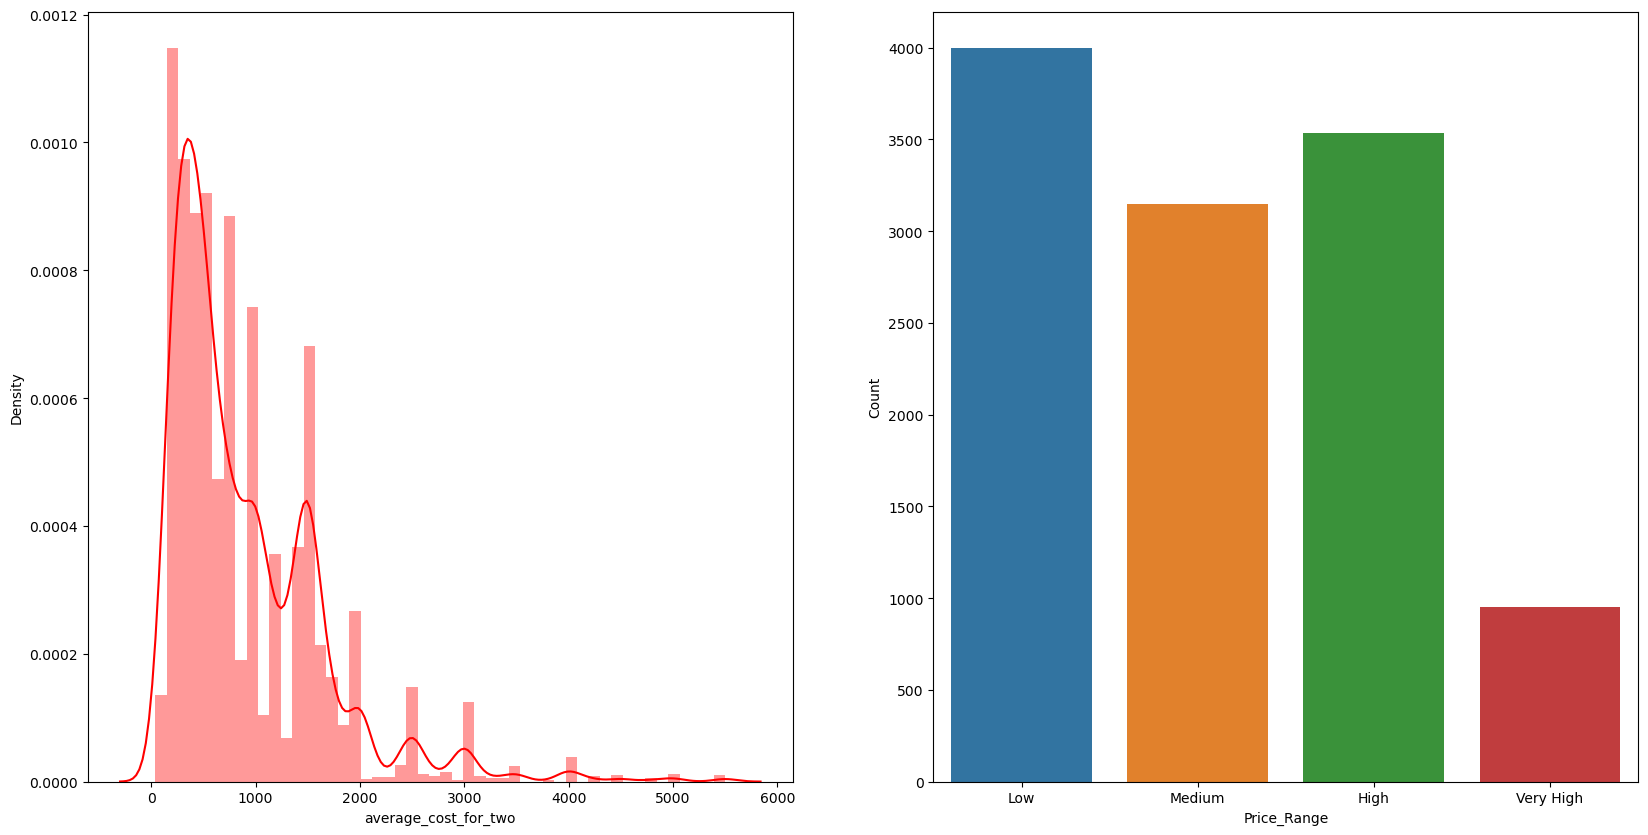

In [26]:
rd_pr = zch.price_range.value_counts().reset_index().set_index('index') 
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=rd_pr.index,y=rd_pr.price_range,ax=ax[1])
plt.xlabel('Price_Range')
plt.xticks(ticks=(0,1,2,3),labels=('Low','Medium','High','Very High'))
plt.ylabel('Count')
sns.distplot(zch.average_cost_for_two,ax=ax[0],color='r')

/Users/syedmanzoor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/syedmanzoor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aggregate_rating'>

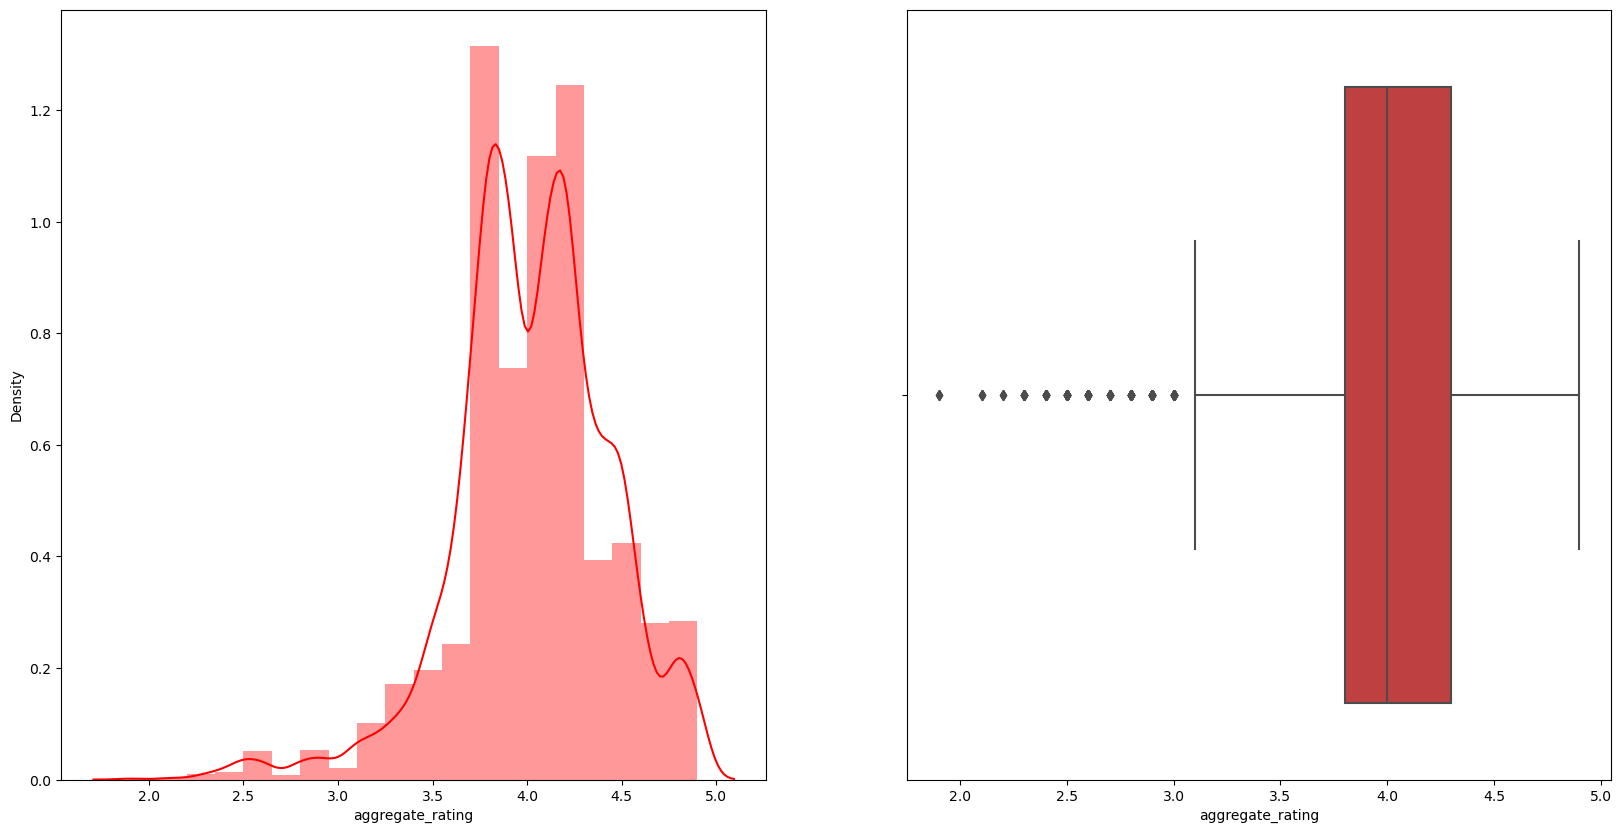

In [27]:
zch_rat = zch[zch.aggregate_rating != 0]
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.distplot(zch_rat.aggregate_rating,bins=20,kde=True,color='r',ax=ax[0])
sns.boxplot(zch_rat.aggregate_rating,ax=ax[1],color='r',saturation=0.5)

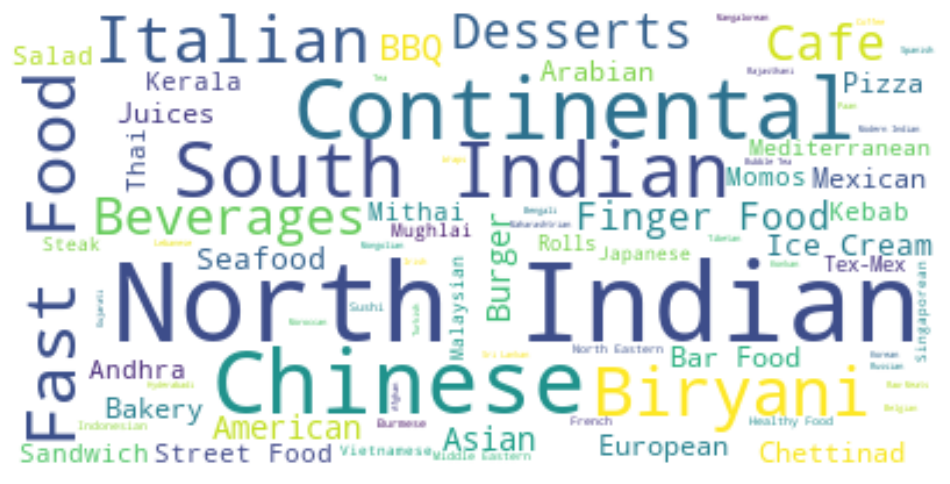

In [32]:
lis = []
for i in range(0,zch.shape[0]):
    for j in zch.iloc[i,4]:
        lis.append(j)
for k in range(0,len(lis)):
    lis[k] = lis[k].strip()
    

cuisine_count = Counter(lis)

wc = WordCloud(background_color='white')
wc.generate_from_frequencies(cuisine_count)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

(0.0, 100.0, 0.0, 100.0)

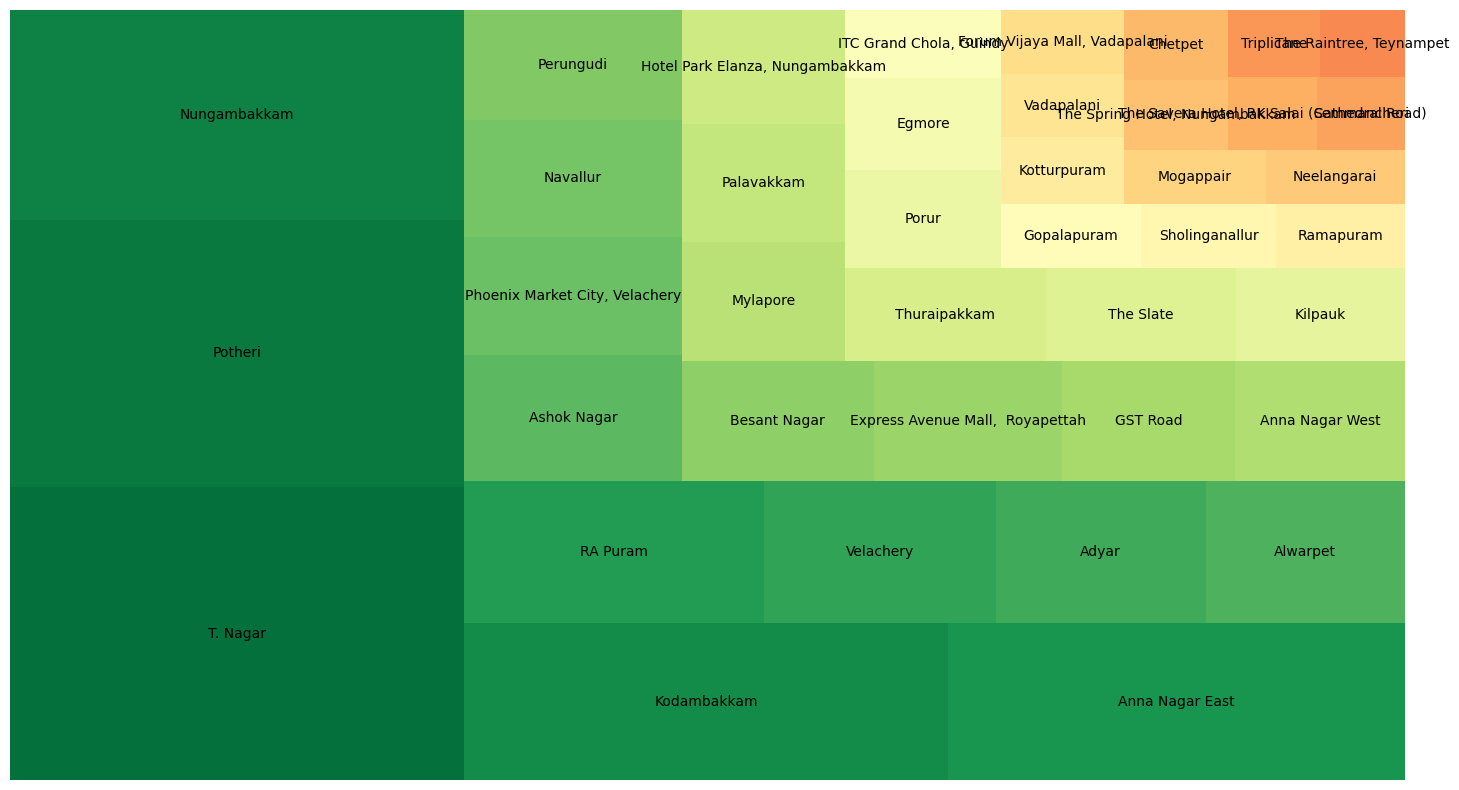

In [37]:

plt.figure(figsize=(18,10))
squarify.plot(sizes=zch.locality.value_counts().head(40),label=zch.locality.value_counts().head(40).index,
              color=sns.color_palette('RdYlGn_r',52))
plt.axis('off')